# Binary segmentation of DTU image

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import maxflow
import numpy as np

def segmentation_histogram(ax, I, S, edges=None):
    '''
    Histogram for data and each segmentation label.
    '''
    if edges is None:
        edges = np.linspace(I.min(), I.max(), 100)
    ax.hist(I.ravel(), bins=edges, color = 'k')
    centers = 0.5*(edges[:-1] + edges[1:]);
    for k in range(S.max()+1):
        ax.plot(centers, np.histogram(I[S==k].ravel(), edges)[0])

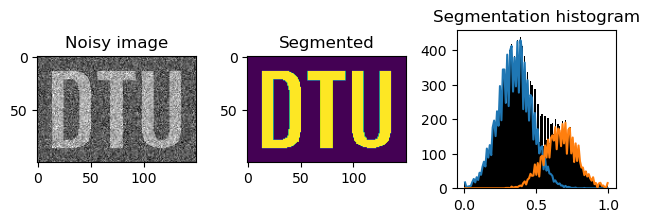

In [3]:
# noisy image
I = imread('../week5/data/DTU_noisy.png').astype(float)/255

# MRF parameters
beta  = 0.1

# An array holding the mean values for the two segments to be identified in the image. 
# These means are used to determine how likely each pixel belongs to one segment or the other based on its intensity.
mu = [90/255, 170/255]

# Each pixel in the image is represented by a node. 
# The nodes are connected to each other (to represent the smoothness constraint) and to two special nodes, source and sink, 
# representing the two segments.
g = maxflow.Graph[float]()
nodeids = g.add_grid_nodes(I.shape)

# Edges connecting pixels to each other are weighted by beta, encouraging smoothness in the segmentation.
g.add_grid_edges(nodeids, beta)

# Edges connecting pixels to the source or sink (terminal edges) are weighted based on the difference in intensity from the segment means (mu). 
# This setup aims to classify pixels into the segment to which they are most similar in intensity.
g.add_grid_tedges(nodeids, (I - mu[1])**2, (I - mu[0])**2)

#  Graph cut
g.maxflow()
S = g.get_grid_segments(nodeids)

# Visualization
fig, ax = plt.subplots(1, 3)
ax[0].imshow(I, vmin=0, vmax=1, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')
ax[1].imshow(S)
ax[1].set_title('Segmented')
segmentation_histogram(ax[2], I, S, edges=None)
ax[2].set_aspect(1./ax[2].get_data_ratio())
ax[2].set_title('Segmentation histogram')
plt.tight_layout()
plt.show()

